# Computational Machine Learning - Assignment 2
Team: QWERTY;
Members: Tanvir Azhar, Nathan Boc 



## Image Classification Project - Colon Cancer Cell Prediction


*   Description of the dataset:
*   Current Literature of the existing problem:
*   Our Performance Metrics: 



### Setting up Environments & Liberaries 




In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
cd /content/drive/MyDrive/Colab Notebooks/MLAssignment2

/content/drive/MyDrive/Colab Notebooks/MLAssignment2


In [26]:
# import common packages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import pathlib
import shutil
import tempfile
from matplotlib import pyplot as plt
%matplotlib inline

# fix 'failed conv' on rtx gpu
devices = tf.config.experimental.list_physical_devices('GPU')
for device in devices:
    tf.config.experimental.set_memory_growth(device, True)

### Exploratory Data Analysis 

In [ ]:
# unzipper for colab 
!apt install unzip

In [ ]:
# unzip the files 
!unzip Image_classification_data.zip

In [31]:
# path to data files
train_file_1 = 'data_labels_mainData.csv'
# load train data and view some rows 
df_train = pd.read_csv(train_file_1)
df_train.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


Great! No Null Values

In [33]:
df_train.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


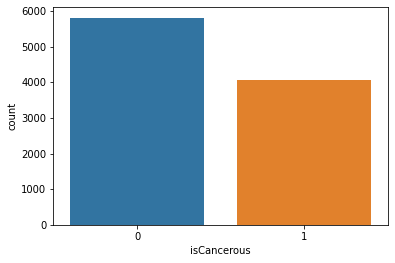

In [34]:
sns.countplot(df_train['isCancerous'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


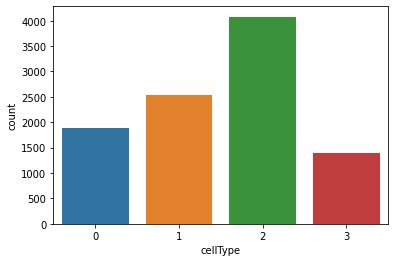

In [35]:
sns.countplot(df_train['cellType'])

There are class imbalances in our data